# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## EOS 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_eos_train_data = pd.read_csv('vader_textblob_eos_train_data').drop('Unnamed: 0',axis=1)
flair_eos_train_data = pd.read_csv('flair_eos_train_data.csv').drop('Unnamed: 0',axis=1)
eos_train_data = pd.read_csv('eos_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_eos_test_data = pd.read_csv('vader_textblob_eos_test_data').drop('Unnamed: 0',axis=1)
flair_eos_test_data = pd.read_csv('flair_eos_test_data.csv').drop('Unnamed: 0',axis=1)
eos_test_data = pd.read_csv('eos_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(eos_train_data,eos_test_data)

In [7]:
coin =  gfmodel.coin_data_load('eos')

  0%|          | 0/1783 [00:00<?, ?it/s]

In [8]:
gfmodel.convert_train_data(vader_textblob_eos_train_data,flair_eos_train_data)
gfmodel.convert_test_data(vader_textblob_eos_test_data,flair_eos_test_data)

(1618, 11)
(1618, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/1618 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/4327 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,10758,11.1246,0.123607,7.949459,0.088327,14.681558,0.163128,179948,1999.422222,...,2.32,4.550915e+08,2.291186e+09,2022-04-29,2.32,2.37,2.24,2.27,5.263495e+08,2.244562e+09
1,2022-04-29,33669,51.0587,0.163650,39.481157,0.126542,59.272639,0.189976,754531,2418.368590,...,2.27,5.263495e+08,2.244562e+09,2022-04-30,2.27,2.28,1.96,2.02,4.409259e+08,1.991908e+09
2,2022-04-30,23190,21.9473,0.113130,13.189978,0.067990,-3.450222,-0.017785,233968,1206.020619,...,2.02,4.409259e+08,1.991908e+09,2022-05-01,2.02,2.11,2.02,2.11,3.543319e+08,2.084037e+09
3,2022-05-01,29867,11.9253,0.047511,9.892677,0.039413,-25.928614,-0.103301,238663,950.848606,...,2.11,3.543319e+08,2.084037e+09,2022-05-02,2.11,2.14,2.04,2.09,3.678504e+08,2.069869e+09
4,2022-05-02,24140,23.5586,0.118983,27.521970,0.139000,28.316634,0.143013,306448,1547.717172,...,2.09,3.678504e+08,2.069869e+09,2022-05-03,2.09,2.12,2.03,2.05,2.934446e+08,2.030487e+09
5,2022-05-03,11880,3.0903,0.030003,4.306782,0.041813,14.707439,0.142791,150835,1464.417476,...,2.05,2.934446e+08,2.030487e+09,2022-05-04,2.05,2.23,2.05,2.23,4.306774e+08,2.205679e+09
6,2022-05-04,12862,11.3727,0.099761,12.691196,0.111326,23.332088,0.204667,222128,1948.491228,...,2.23,4.306774e+08,2.205679e+09,2022-05-05,2.23,2.24,1.98,2.02,5.203276e+08,1.995444e+09
7,2022-05-05,20834,5.6634,0.032362,17.315455,0.098945,23.411632,0.133781,521063,2977.502857,...,2.02,5.203276e+08,1.995444e+09,2022-05-06,2.02,2.05,1.95,2.03,4.358418e+08,2.003229e+09
8,2022-05-06,52239,26.1050,0.057374,35.332569,0.077654,108.474735,0.238406,1320314,2901.789011,...,2.03,4.358418e+08,2.003229e+09,2022-05-07,2.03,2.05,1.94,1.98,3.532403e+08,1.958510e+09
9,2022-05-07,28920,21.2513,0.086387,15.069111,0.061257,51.465132,0.209208,486301,1976.833333,...,1.98,3.532403e+08,1.958510e+09,2022-05-08,1.98,1.99,1.94,1.95,3.709376e+08,1.926168e+09


In [9]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.207300,-0.450903,1.124034,-0.756994,-0.049312,-0.639870,0.085618,-0.888330,-0.187545,-0.598483,...,1.294462,-0.319680,1.291119,1.294462,1.336675,1.379784,1.315028,0.026387,1.319622,2022-04-28
1,0.289201,2.381045,2.016967,0.613307,0.879640,0.410282,0.323119,0.367504,0.439582,-0.505852,...,1.149496,-0.009443,1.154082,1.149496,1.065080,0.589438,0.585411,-0.337019,0.571570,2022-04-29
2,-0.395266,0.316595,0.890420,-0.529252,-0.543695,-1.066887,-1.514766,-0.770262,-1.375199,-0.477969,...,0.424665,-0.381353,0.411499,0.424665,0.552066,0.758798,0.848073,-0.705405,0.844344,2022-04-30
3,0.040862,-0.394121,-0.572846,-0.672546,-1.238352,-1.596270,-2.271258,-0.760000,-1.757170,-0.508688,...,0.685604,-0.758358,0.682279,0.685604,0.642598,0.815252,0.789703,-0.647895,0.802396,2022-05-01
4,-0.333214,0.430861,1.020925,0.093586,1.182470,-0.318754,-0.092323,-0.611846,-0.863709,-0.579106,...,0.627618,-0.699502,0.640637,0.627618,0.582244,0.787025,0.672965,-0.964429,0.685794,2022-05-02
5,-1.134013,-1.020660,-0.963268,-0.915297,-1.180002,-0.639261,-0.094293,-0.951961,-0.988401,-0.604390,...,0.511645,-1.023443,0.524888,0.511645,0.914194,0.843478,1.198289,-0.380618,1.204498,2022-05-03
6,-1.069871,-0.433309,0.592281,-0.550928,0.509762,-0.436144,0.453078,-0.796140,-0.263784,-0.596829,...,1.033523,-0.425972,1.039799,1.033523,0.944371,0.645892,0.585411,0.000769,0.582040,2022-05-04
7,-0.549156,-0.838187,-0.910656,-0.349968,0.208801,-0.434271,-0.173996,-0.142774,1.276558,-0.538935,...,0.424665,-0.035661,0.421892,0.424665,0.371003,0.561212,0.614595,-0.358648,0.605089,2022-05-05
8,1.502157,0.611440,-0.352919,0.433018,-0.308766,1.569027,0.751534,1.604104,1.163221,-0.090198,...,0.453658,-0.403487,0.444772,0.453658,0.371003,0.532985,0.468672,-0.710049,0.472686,2022-05-06
9,-0.020994,0.267237,0.294069,-0.447589,-0.707366,0.226410,0.493243,-0.218752,-0.221359,-0.499945,...,0.308692,-0.763110,0.313338,0.308692,0.189939,0.532985,0.381118,-0.634761,0.376928,2022-05-07


In [10]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
gfmodel.make_model()

In [12]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,2.232600,2.27,2022-04-28,4.550915e+08,2.32,2022-04-29,-21.551724,-0.087400,True
1,2.192688,2.02,2022-04-29,5.263495e+08,2.27,2022-04-30,-110.132159,-0.077312,True
2,1.986266,2.11,2022-04-30,4.409259e+08,2.02,2022-05-01,44.554455,-0.033734,False
3,2.066334,2.09,2022-05-01,3.543319e+08,2.11,2022-05-02,-9.478673,-0.043666,True
4,2.023901,2.05,2022-05-02,3.678504e+08,2.09,2022-05-03,-19.138756,-0.066099,True
5,1.963576,2.23,2022-05-03,2.934446e+08,2.05,2022-05-04,87.804878,-0.086424,False
6,2.136428,2.02,2022-05-04,4.306774e+08,2.23,2022-05-05,-94.170404,-0.093572,True
7,1.938260,2.03,2022-05-05,5.203276e+08,2.02,2022-05-06,4.950495,-0.081740,False
8,1.935780,1.98,2022-05-06,4.358418e+08,2.03,2022-05-07,-24.630542,-0.094220,True
9,1.902740,1.95,2022-05-07,3.532403e+08,1.98,2022-05-08,-15.151515,-0.077260,True


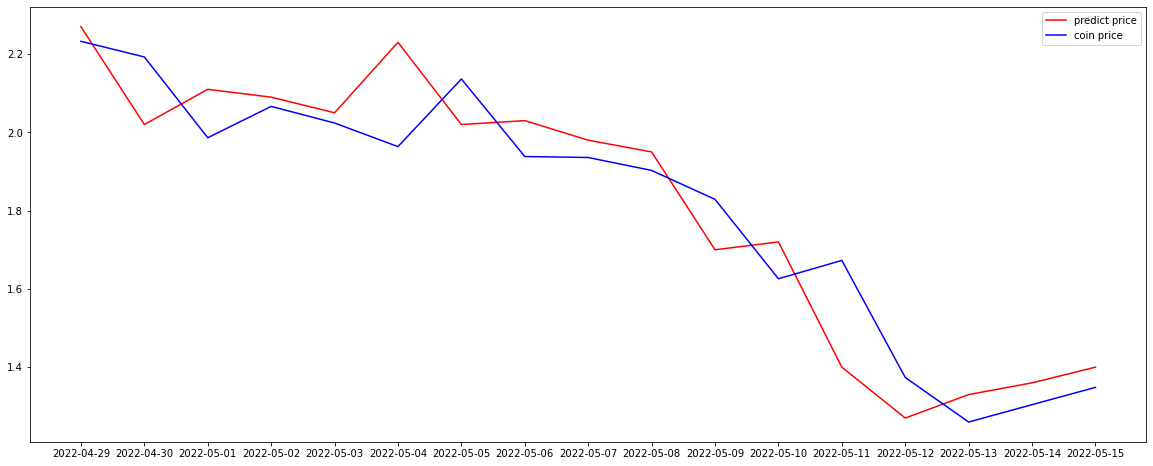

In [13]:
gfmodel.visualize()

In [14]:
result.to_csv('EOS_result_data')
gfmodel.save_csv('EOS_Visulize_data.csv')